In [1]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
from charon import profile
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import Spectra_generator, Spectra_extrapolate, Spectra_interpolation,Flux_interpolation, Flux_generator, Signal_PDF
from scipy.interpolate import splrep, splev
from ipynb.fs.full.func_plot_histo import plot_projections

In [2]:
mass = 1e7
process = 'decay'
channel = 'nuenue'
galactic_profile = profile.NFW

In [3]:
Spectra_nue = Spectra_generator(mass,channel,process,nodes=300,bins=300,logscale=True,interactions=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


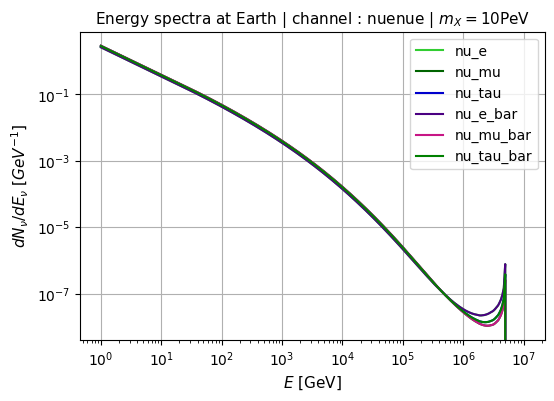

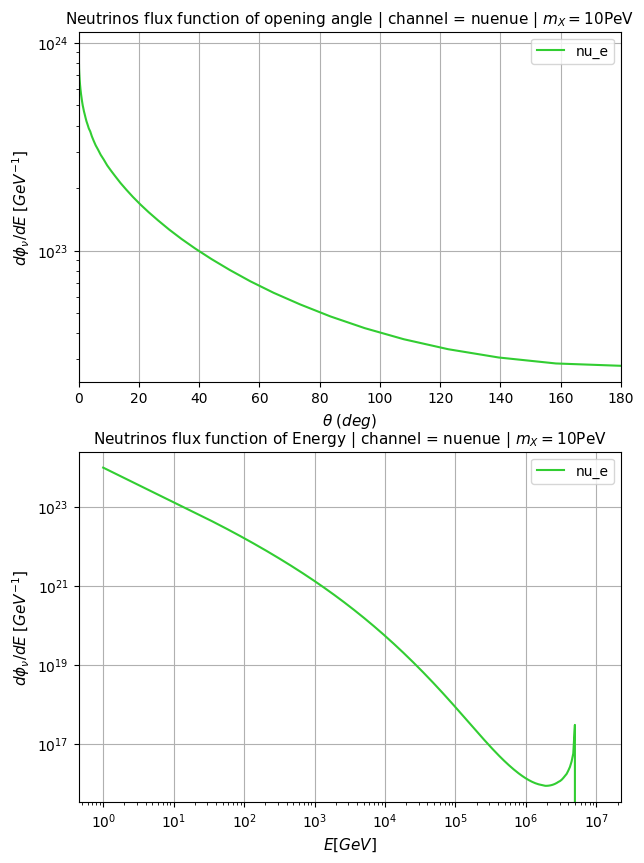

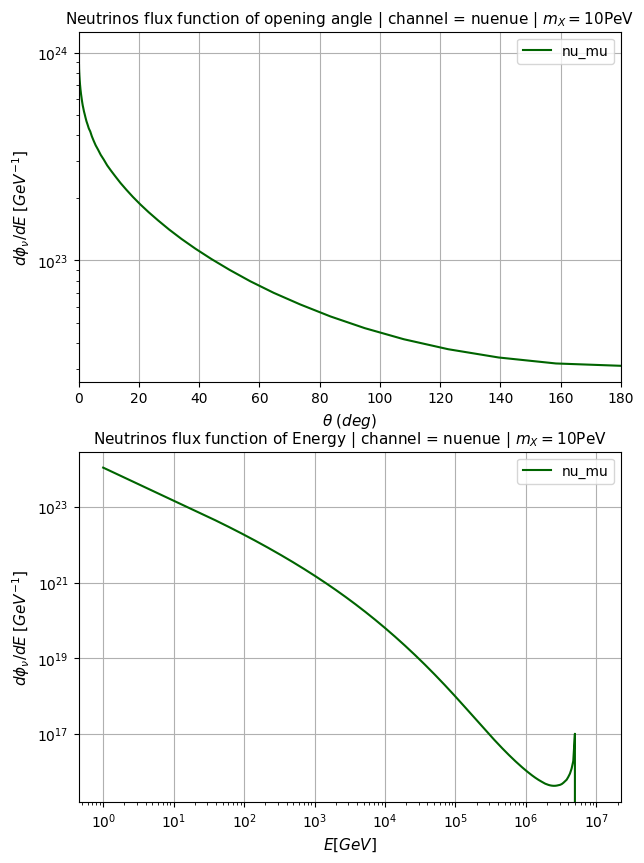

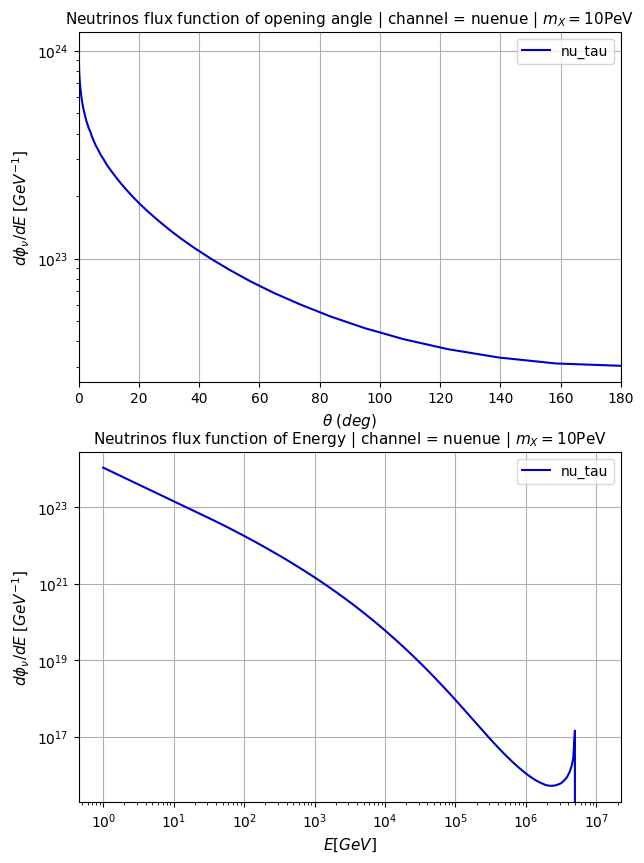

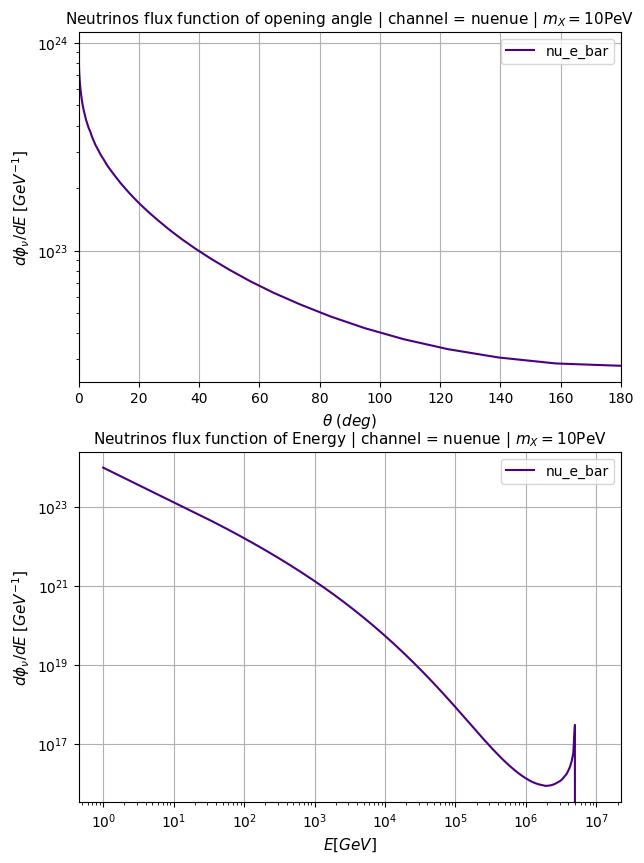

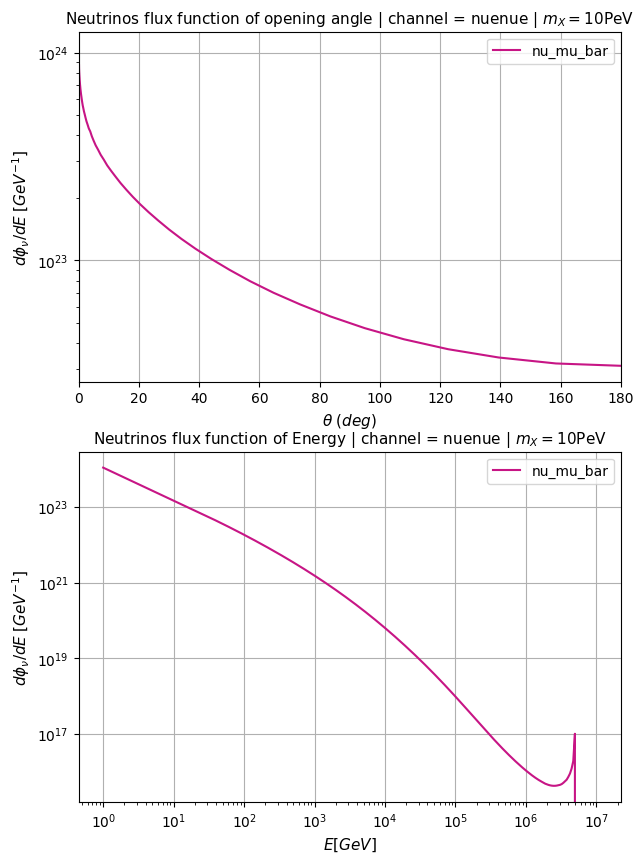

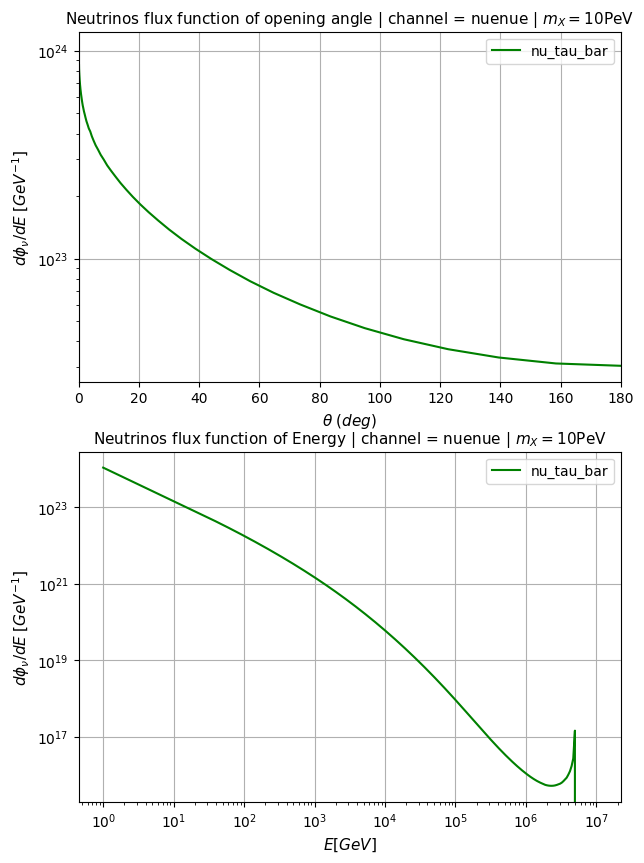

In [4]:
Flux_nue = Flux_generator(mass,channel,process,galactic_profile=galactic_profile, extrapolation=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


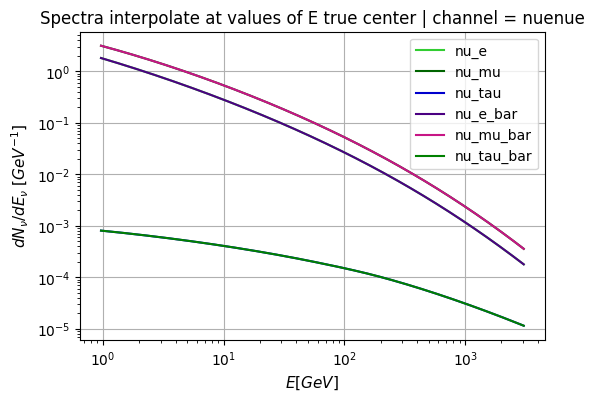

In [5]:
Spectra_nue = Spectra_interpolation(mass=1e6, channel='nuenue', process='decay', source=True, extrapolation=False, galactic_profile=profile.NFW)